In [ ]:
## Multiple linear regression

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
# imorting data set
datasets = pd.read_csv('2016-17.csv')

In [4]:
datasets.head()

,District,Ground nut,Bengal Gram,Maize,Rainfall,Avg temp,humidity
0,ADILABAD,2068,1551,5712,2.040478,27.604044,57.256654
1,BHADRADRI,2186,1881,4917,1.912448,28.190647,60.220848
2,HYDERABAD,0,1299,5410,0.000000,28.157335,60.327238
3,JAGTIAL,1794,1173,6300,1.997002,27.864162,59.409688
4,JANGAON,1516,1558,5433,1.909680,27.833555,59.651009


In [5]:
datasets.describe()

,Ground nut,Bengal Gram,Maize,Rainfall,Avg temp,humidity
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1879.935484,1241.903226,4150.258065,2.091190,28.098623,61.600370
std,616.887182,381.600345,1907.126721,0.467440,0.698296,2.687195
min,0.000000,0.000000,0.000000,0.000000,26.947427,57.256654
25%,1740.500000,1299.000000,2708.000000,1.966927,27.572991,59.789479
50%,2066.000000,1299.000000,4917.000000,2.170238,28.082407,60.655948
75%,2068.000000,1319.500000,5616.000000,2.316836,28.528320,62.985528
max,3265.000000,1881.000000,6999.000000,2.662466,29.308504,68.182998


In [6]:
datasets = datasets.rename(columns=({'Ground nut':'groundnut','Bengal Gram':'bengalgram','Avg temp':'avgtemp'}))
datasets.head()

,District,groundnut,bengalgram,Maize,Rainfall,avgtemp,humidity
0,ADILABAD,2068,1551,5712,2.040478,27.604044,57.256654
1,BHADRADRI,2186,1881,4917,1.912448,28.190647,60.220848
2,HYDERABAD,0,1299,5410,0.000000,28.157335,60.327238
3,JAGTIAL,1794,1173,6300,1.997002,27.864162,59.409688
4,JANGAON,1516,1558,5433,1.909680,27.833555,59.651009


In [7]:
cdf = datasets[['groundnut','bengalgram','Maize','Rainfall','Rainfall','avgtemp','humidity']]
cdf.head(9)

,groundnut,bengalgram,Maize,Rainfall,Rainfall,avgtemp,humidity
0,2068,1551,5712,2.040478,2.040478,27.604044,57.256654
1,2186,1881,4917,1.912448,1.912448,28.190647,60.220848
2,0,1299,5410,0.000000,0.000000,28.157335,60.327238
3,1794,1173,6300,1.997002,1.997002,27.864162,59.409688
4,1516,1558,5433,1.909680,1.909680,27.833555,59.651009
5,2151,1299,5251,1.783163,1.783163,27.541939,59.700592
6,2025,1299,6306,1.969155,1.969155,28.082407,61.858785
7,2068,1299,5103,2.526276,2.526276,28.390276,63.275337
8,2411,0,6076,1.505719,1.505719,28.840547,66.973638


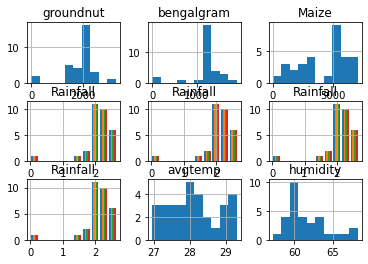

In [8]:
viz = cdf[['groundnut','bengalgram','Maize','Rainfall','Rainfall','avgtemp','humidity']]
viz.hist()
plt.show()

<AxesSubplot:>

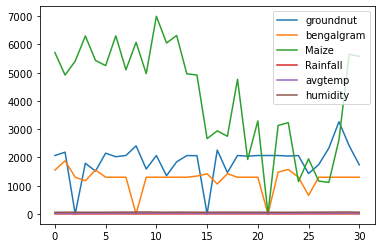

In [10]:
datasets.plot()

<AxesSubplot:xlabel='Rainfall', ylabel='groundnut'>

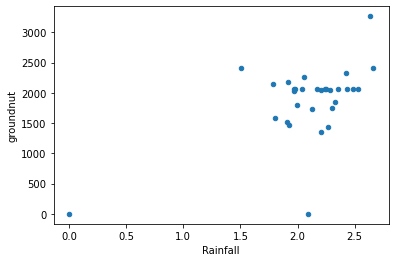

In [11]:
datasets.plot(kind='scatter',x='Rainfall',y='groundnut')

<AxesSubplot:ylabel='Density'>

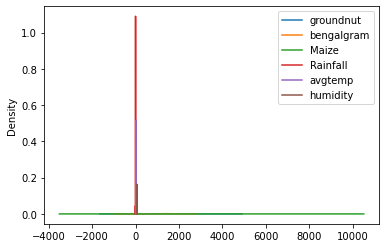

In [12]:
datasets.plot(kind='density')

<AxesSubplot:ylabel='Frequency'>

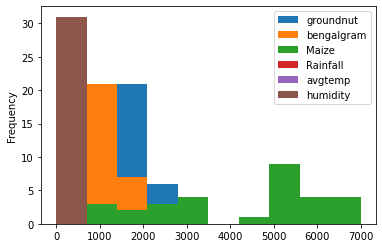

In [13]:
datasets.plot(kind='hist')

<AxesSubplot:xlabel='Rainfall', ylabel='bengalgram'>

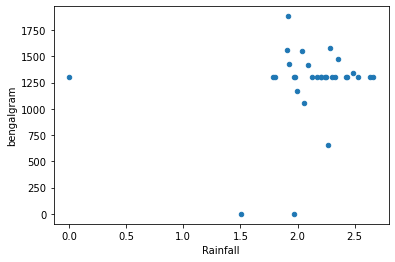

In [14]:
datasets.plot(kind='scatter',x='Rainfall',y='bengalgram')

<AxesSubplot:xlabel='Rainfall', ylabel='Maize'>

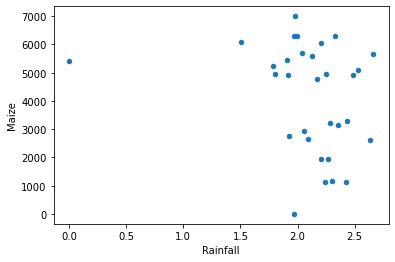

In [15]:
datasets.plot(kind='scatter',x='Rainfall',y='Maize')

<AxesSubplot:xlabel='avgtemp', ylabel='Maize'>

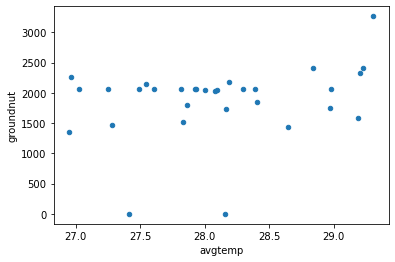

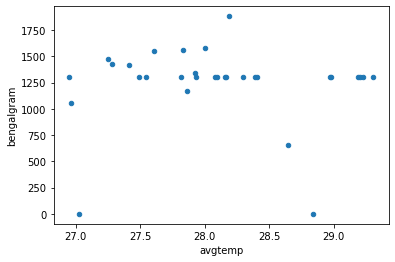

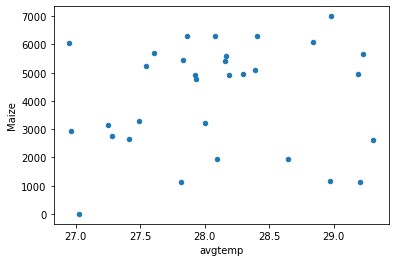

In [16]:
datasets.plot(kind='scatter',x='avgtemp',y='groundnut')
datasets.plot(kind='scatter',x='avgtemp',y='bengalgram')
datasets.plot(kind='scatter',x='avgtemp',y='Maize')

<AxesSubplot:xlabel='humidity', ylabel='Maize'>

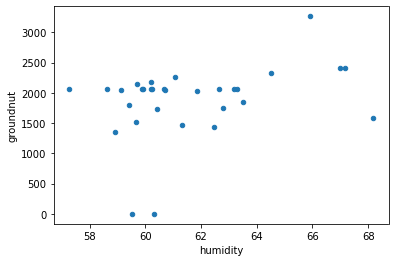

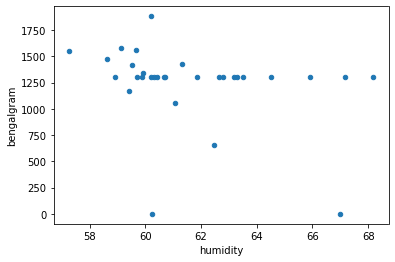

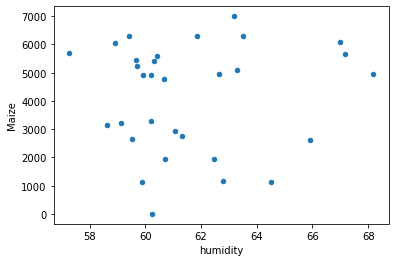

In [17]:
datasets.plot(kind='scatter',x='humidity',y='groundnut')
datasets.plot(kind='scatter',x='humidity',y='bengalgram')
datasets.plot(kind='scatter',x='humidity',y='Maize')

In [19]:
msk = np.random.rand(len(datasets)) < 0.8
train = cdf[msk]
test = cdf[~msk]

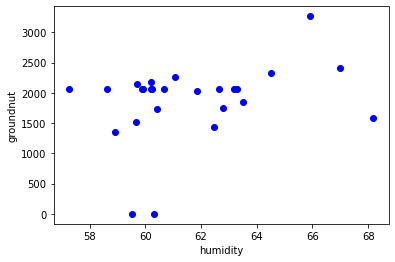

In [21]:
plt.scatter(train.humidity, train.groundnut, color='blue')
plt.xlabel("humidity")
plt.ylabel("groundnut")
plt.show()

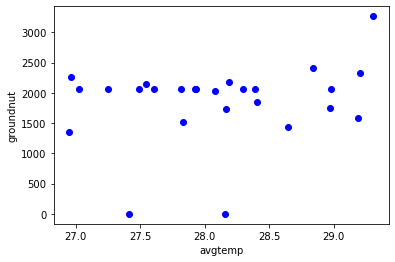

In [23]:
plt.scatter(train.avgtemp, train.groundnut, color='blue')
plt.xlabel("avgtemp")
plt.ylabel("groundnut")
plt.show()

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Rainfall','humidity','avgtemp']])
y = np.asanyarray(train[['groundnut']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[366.59060839 366.59060839  75.7798973  -26.47089761]]


In [29]:
y_hat= regr.predict(test[['Rainfall','humidity','avgtemp']])
x = np.asanyarray(test[['Rainfall','humidity','avgtemp']])
y = np.asanyarray(test[['groundnut']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 50167.51
Variance score: 0.50


In [30]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Rainfall','humidity','avgtemp']])
y = np.asanyarray(train[['bengalgram']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[  62.15353541   62.15353541 -151.34535112  453.09256786]]


In [31]:
y_hat= regr.predict(test[['Rainfall','humidity','avgtemp']])
x = np.asanyarray(test[['Rainfall','humidity','avgtemp']])
y = np.asanyarray(test[['bengalgram']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 97369.91
Variance score: -4.24


In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Rainfall','humidity','avgtemp']])
y = np.asanyarray(train[['Maize']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-569.14105232 -569.14105232  -49.96697455  338.74541159]]


In [33]:
y_hat= regr.predict(test[['Rainfall','humidity','avgtemp']])
x = np.asanyarray(test[['Rainfall','humidity','avgtemp']])
y = np.asanyarray(test[['Maize']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 3041029.03
Variance score: -0.05
